The equation for calculate ks is :

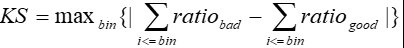 

The equation for calcluate iv is : 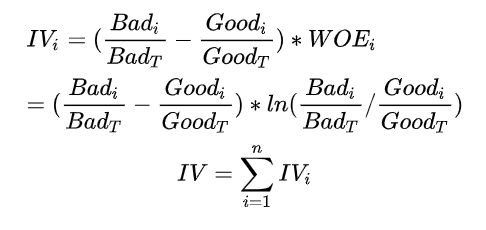

In [ ]:
def cal_ks_iv(x,y,n=10): 
    # x is the labels ，y is the target, n is the number of binnings, x,y should be in type of pd.dataframe
   
    total = y.count()  
    bad = y.sum()      
    good = y.count()-y.sum()  
    d1 = pd.DataFrame({'x':x,'y':y,'bucket':pd.qcut(x,n,duplicates="drop")})  
    d2 = d1.groupby('bucket',as_index=True)  
    d3 = pd.DataFrame(d2.x.min(),columns=['min_bin']) 
    d3['min_bin'] = d2.x.min()  
    d3['max_bin'] = d2.x.max()  
    d3['bad'] = d2.y.sum()  
    d3['total'] = d2.y.count() 
    d3['bad_rate'] = d3['bad']/d3['total']  
    d3['badattr'] = d3['bad']/bad   
    d3['goodattr'] = (d3['total'] - d3['bad'])/good  
    d3['woe'] = np.log(d3['goodattr']/d3['badattr'])  
    iv = ((d3['goodattr']-d3['badattr'])*d3['woe']).sum()  
    d4 = (d3.sort_values(by='min_bin')).reset_index(drop=True) 
    d4['i_bad']=d4['badattr'].cumsum()
    d4['i_good']=d4['goodattr'].cumsum()
    d4['ks']=abs(d4['i_good']-d4['i_bad'])
    ks = max(d4['ks'])
    print('The value of IV is ：',iv)
    print('The value of KS is ：',ks)
    

 The equation for calculate PSI is: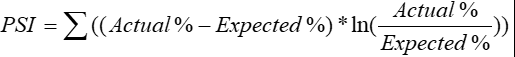

In [ ]:
def cal_psi(actual,predict,n=10): 
    # n is the number of binnings, actual and predict should be in type of pd.dataframe
    d1 = pd.DataFrame({"x":actual,'bucket':pd.qcut(actual,n,duplicates="drop")})
    d2 = d1.groupby('bucket',as_index=True)  
    d3 = pd.DataFrame(d2.x.min(),columns=['min_bin']) 
    d3['min_bin'] = d2.x.min()  
    d3['max_bin'] = d2.x.max()  
    d3['actual'] = d2.x.count()  
    d3['predict'] = d3['actual']

    for i in range(n):
        d3['predict'][i]=len([x for x in predict if x > d3['min_bin'].values[i]-((d3['max_bin'].values[i]-d3['min_bin'].values[i])/100) and x <= d3['max_bin'].values[i]])
   
    d3['act%'] = (d3['actual']/len(actual))
    d3['pre%'] = (d3['predict']/len(predict))
    d3['psi%'] = d3['pre%']
    
    for i in range(n):
        d3['psi%'][i] =  (d3['act%'].values[i]-d3['pre%'].values[i])*math.log(d3['act%'].values[i]/d3['pre%'].values[i])
    
    psi = d3['psi%'].sum()
    print('The value of Psi is ：',psi)